In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
import plotly.express as px

In [5]:
plt.style.use('fivethirtyeight')

In [6]:
#df = pd.json_normalize(data)

In [7]:
df1 = pd.read_csv('https://api.data.gov.in/resource/1d4d1c5a-feea-423b-be4f-c3636fdd1d82?api-key=579b464db66ec23bdd000001eeb006565fe34e9b44a56fa2d59aee2d&format=csv&limit=1000')

In [8]:
df1.columns

Index(['gender', 'age', 'differentlyAbledStatus', 'educationQualification',
       'currentStateCode', 'currentStateName', 'currentDistrictCode',
       'currentDistrictName', 'permanentStateCode', 'permanentStateName',
       'primaryOccupation', 'Data Gov Update Date'],
      dtype='object')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   age                     1000 non-null   int64 
 2   differentlyAbledStatus  1000 non-null   object
 3   educationQualification  1000 non-null   object
 4   currentStateCode        1000 non-null   int64 
 5   currentStateName        1000 non-null   object
 6   currentDistrictCode     1000 non-null   int64 
 7   currentDistrictName     1000 non-null   object
 8   permanentStateCode      1000 non-null   int64 
 9   permanentStateName      1000 non-null   object
 10  primaryOccupation       1000 non-null   object
 11  Data Gov Update Date    1000 non-null   object
dtypes: int64(4), object(8)
memory usage: 93.9+ KB


In [10]:
df1.head()

,gender,age,differentlyAbledStatus,educationQualification,currentStateCode,currentStateName,currentDistrictCode,currentDistrictName,permanentStateCode,permanentStateName,primaryOccupation,Data Gov Update Date
0,MALE,29,NOT DISABLED,GRADUATE,23,MADHYA PRADESH,422,RAJGARH,23,MADHYA PRADESH,AGRICULTURE,2024-08-16
1,MALE,37,NOT DISABLED,GRADUATE,19,WEST BENGAL,303,24 PARAGANAS NORTH,19,WEST BENGAL,ELECTRONICS & HW,2024-08-16
2,MALE,40,NOT DISABLED,SECONDARY,21,ODISHA,355,JAGATSINGHAPUR,21,ODISHA,CONSTRUCTION,2024-08-16
3,FEMALE,28,NOT DISABLED,GRADUATE,10,BIHAR,196,GAYA,10,BIHAR,AGRICULTURE,2024-08-16
4,MALE,32,NOT DISABLED,PRIMARY,9,UTTAR PRADESH,160,KUSHI NAGAR,9,UTTAR PRADESH,AGRICULTURE,2024-08-16


# **gender wise data**

In [11]:
gen_cat = df1.groupby(by=["gender"]).size().reset_index(name="counts")
px.bar(data_frame=gen_cat,x="gender",y="counts", color='gender', title ="Gender wise distribution")

#Countplot for differentlyAbledStatus

In [12]:
# Countplot for differentlyAbledStatus
diff_abled_cat = df1.groupby(by=['differentlyAbledStatus']).size().reset_index(name='counts')
countplot = px.bar(data_frame = diff_abled_cat, x ='differentlyAbledStatus', y ='counts',title = 'Countplot for Differently Abled Status')
countplot.show()

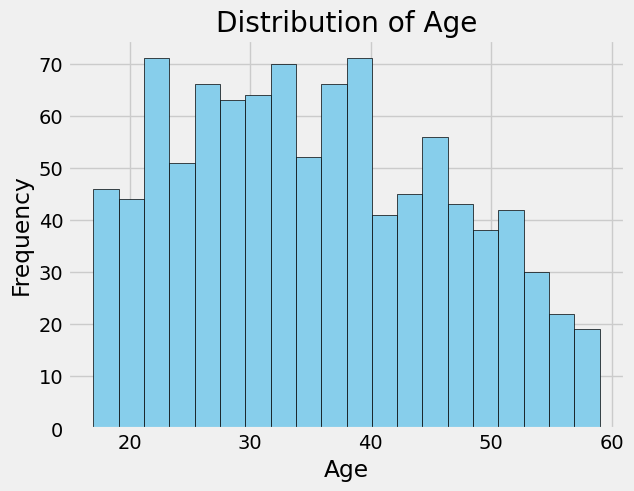

In [13]:
plt.hist(df1['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
fig = px.box(df1, x="gender", y="age",color='gender')
fig.show()

# Number of Unorganised Workers per State in India

In [15]:
fp = "/content/drive/MyDrive/archive/Indian_States.shp"
map_df = gpd.read_file(fp)
map_df.head()
map_df['st_nm'] = map_df['st_nm'].apply(str.upper)
map_df.head()

,st_nm,geometry
0,ANDAMAN & NICOBAR ISLAND,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,ARUNANCHAL PRADESH,"POLYGON ((96.16261 29.38078, 96.1686 29.37432,..."
2,ASSAM,"MULTIPOLYGON (((89.74323 26.30362, 89.7429 26...."
3,BIHAR,"MULTIPOLYGON (((84.5072 24.26323, 84.50355 24...."
4,CHANDIGARH,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


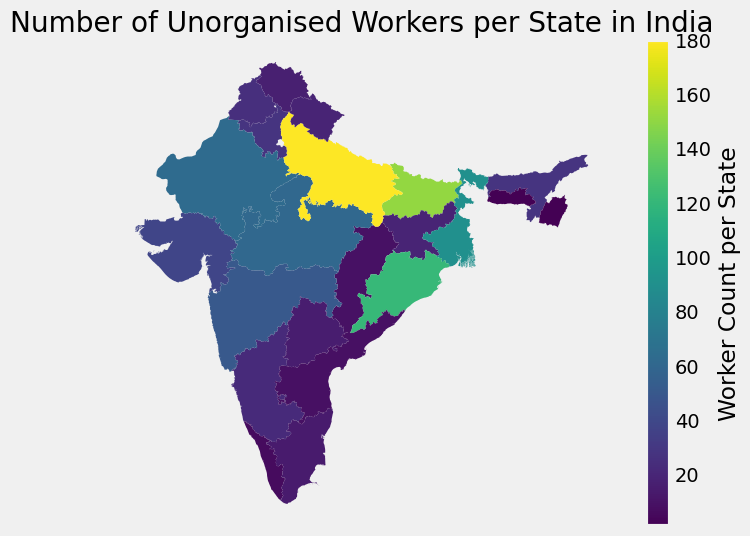

In [16]:
# Load Indian states shapefile
map_df = gpd.read_file("/content/drive/MyDrive/archive/Indian_States.shp")
map_df['st_nm'] = map_df['st_nm'].apply(str.upper)

# Merge data with state-wise counts
state_counts = df1['currentStateName'].value_counts().reset_index()
state_counts.columns = ['State', 'Worker_Count']
merged_data = map_df.merge(state_counts, left_on='st_nm', right_on='State', how='left')

# Plot the map
fig, ax = plt.subplots(1, figsize=(8,6))
ax.axis('off')
merged_data.plot(column='Worker_Count', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "Worker Count per State"})
ax.set_title('Number of Unorganised Workers per State in India')
plt.show()

In [17]:
state_cat = df1.groupby(by=["currentStateName"]).size().reset_index(name="counts")
px.bar(data_frame=state_cat,x="currentStateName",y="counts")
state_cat10 = state_cat.nlargest(10,'counts')
px.bar(data_frame=state_cat10,x="currentStateName",y="counts")

# Number of Unorganised Workers per Districit in India

In [18]:
dist_cat = df1.groupby(by=["currentDistrictName"]).size().reset_index(name="counts")
dist_plot = px.bar(data_frame=dist_cat,x="currentDistrictName",y="counts")
dist_cat10 = dist_cat.nlargest(10,'counts')
top_10_dist = px.bar(data_frame=dist_cat10,x='currentDistrictName',y='counts', color='currentDistrictName', title="Top 10 Current Districts of Migrants")
top_10_dist

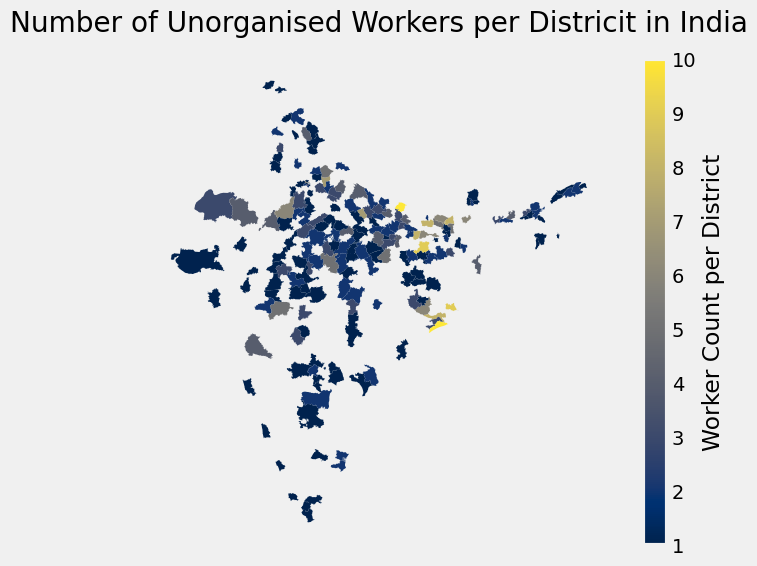

In [19]:
# Load Indian districts shapefile
dist_df = gpd.read_file("/content/drive/MyDrive/archive 2/DISTRICT_BOUNDARY.shp")

# Merge data with district-wise counts
dist_counts = df1['currentDistrictName'].value_counts().reset_index()
dist_counts.columns = ['Districts', 'Worker_Count']
merged_data = dist_df.merge(dist_counts, left_on='District', right_on='Districts', how='left')

# Plot the map
fig, ax = plt.subplots(1, figsize=(8,6))
ax.axis('off')
merged_data.plot(column='Worker_Count', ax=ax, legend=True, cmap='cividis', legend_kwds={'label': "Worker Count per District"})
ax.set_title('Number of Unorganised Workers per Districit in India')
plt.show()

In [20]:
fp1 = "/content/drive/MyDrive/archive 2/DISTRICT_BOUNDARY.shp"
dist_df = gpd.read_file(fp1)
dist_df.head()
# Clean File
dist_df['District'] = dist_df['District'].str.replace('>', 'A')
dist_df['STATE'] = dist_df['STATE'].str.replace('>', 'A')
dist_df['District'] = dist_df['District'].str.replace('@', 'U')
dist_df.head(60)

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
0,MORBI,GUJARAT,None,24,673,5.394768e+05,4.791280e+09,"POLYGON ((3108952.09 3942577.01, 3109009.987 3..."
1,AHMADABAD,GUJARAT,None,24,438,8.572541e+05,6.966374e+09,"POLYGON ((3193648.356 3920619.089, 3193646.392..."
2,ANAND,GUJARAT,None,24,440,3.930467e+05,3.054307e+09,"POLYGON ((3297696.184 3879979.348, 3297775.311..."
3,DEVBHUMI DWARKA,GUJARAT,None,24,674,6.617330e+05,4.002784e+09,"MULTIPOLYGON (((2924145.687 3865429.524, 29241..."
4,JAMNAGAR,GUJARAT,None,24,447,7.374281e+05,5.694271e+09,"MULTIPOLYGON (((3044918.968 3859136.847, 30448..."
5,KACHCHH,GUJARAT,None,24,449,2.097007e+06,3.913165e+10,"MULTIPOLYGON (((3022570.473 3944081.402, 30225..."
6,BHAVNAGAR,GUJARAT,None,24,443,5.050122e+05,6.514338e+09,"MULTIPOLYGON (((3224033.34 3759508.682, 322398..."
7,BHARUCH,GUJARAT,None,24,442,8.025799e+05,4.745943e+09,"MULTIPOLYGON (((3265674.825 3764366.597, 32657..."
8,SURAT,GUJARAT,None,24,459,5.230863e+05,4.175888e+09,"POLYGON ((3295065.918 3752923.858, 3295235.115..."
9,NAVSARI,GUJARAT,None,24,453,3.275102e+05,2.126084e+09,"POLYGON ((3266101.911 3699818.493, 3266295.418..."


# COUNTPLOT FOR OCCUPATION

In [21]:
# Countplot for occupation
occ_cat = df1.groupby(by=["primaryOccupation"]).size().reset_index(name="counts")
px.bar(data_frame=occ_cat,x="primaryOccupation",y="counts")
occ_cat10 = occ_cat.nlargest(10,'counts')
top_10_occupation = px.bar(data_frame=occ_cat10,x='primaryOccupation',y='counts',color='primaryOccupation')
#top_10_occupation.update_layout(barmode='group', xaxis_tickangle=90)
top_10_occupation.show()